In [5]:
#importing relevant libraries
'''
1) sklearn tools

accuracy_score
how accurate model is

precision_score
tp/tp+fp

recall_score
tp/tp+fn

test_train_split
How to divide given dataset between training set and test set by percentage

2) keras

layers
layers to add to the nn

losses
loss function to consider

datasets
MNIST,CIFAR10,etc.

Models
Sequentail model of network usually used can sequentially add layers to build 

'''
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd3
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
#evaluation

from sklearn.model_selection import train_test_split
#x_train,x_test,y_train,y_test=train_test_split(a,b,test_size=0.2,train_size=None,random_state=42)
#random_state randomizer value

from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
#building the nn


In [6]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

In [18]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

print(x_train.shape)

(60000, 28, 28, 1, 1)


In [8]:
noise_factor = 0.2
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape) 
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape) 

x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

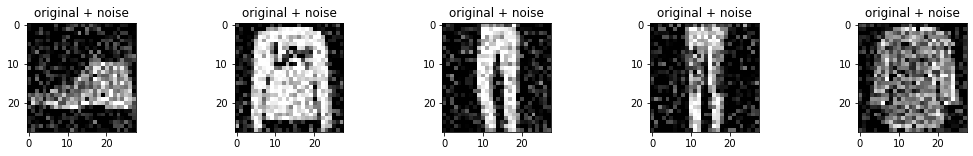

In [10]:
n = 5
plt.figure(figsize=(18, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
plt.show()

In [11]:
class Denoise(Model):
  def __init__(self):
    super(Denoise, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Input(shape=(28, 28, 1)),
      layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2),
      layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2)])

    self.decoder = tf.keras.Sequential([
      layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Denoise()

In [12]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [13]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0198 - val_loss: 0.0119
Epoch 2/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0109 - val_loss: 0.0102
Epoch 3/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0099 - val_loss: 0.0098
Epoch 4/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0094 - val_loss: 0.0092
Epoch 5/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0090 - val_loss: 0.0092
Epoch 6/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0087 - val_loss: 0.0087
Epoch 7/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0086 - val_loss: 0.0085
Epoch 8/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0085 - val_loss: 0.0085
Epoch 9/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0084 - val_loss: 0.0083
Epoch 10/10
1875/1875 [==============================] - 29s 15m

In [14]:
autoencoder.encoder.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 14, 14, 16)        160       
                                                                 
 conv2d_4 (Conv2D)           (None, 7, 7, 8)           1160      
                                                                 
Total params: 1,320
Trainable params: 1,320
Non-trainable params: 0
_________________________________________________________________


In [15]:
autoencoder.decoder.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_transpose_2 (Conv2DT  (None, 14, 14, 8)        584       
 ranspose)                                                       
                                                                 
 conv2d_transpose_3 (Conv2DT  (None, 28, 28, 16)       1168      
 ranspose)                                                       
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 1)         145       
                                                                 
Total params: 1,897
Trainable params: 1,897
Non-trainable params: 0
_________________________________________________________________


In [16]:
encoded = autoencoder.encoder(x_test_noisy).numpy()
decoded = autoencoder.decoder(encoded).numpy()

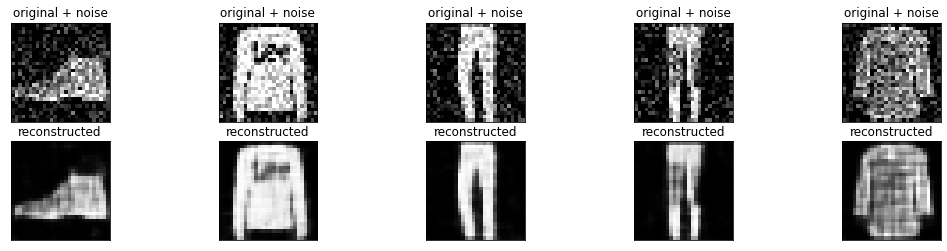

In [17]:
n = 5
plt.figure(figsize=(18, 4))
for i in range(n):

    # display original + noise
    ax = plt.subplot(2, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(2, n, i + n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(decoded[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()